## 1.	Data Cleaning and Preparation:

In [55]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
df = pd.read_csv("Cardiotocographic.csv")
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [57]:
missing_value = df.isnull().sum()
df.fillna(df.median(),inplace = True)
df.dropna(subset = ["Width"],inplace = True)
After_missing_value = df.isnull().sum()
print(After_missing_value)

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64


In [58]:
df.dtypes
df['Width'] = pd.to_numeric(df['Width'],errors ='coerce')

In [59]:
Q1 = df['Width'].quantile(0.25)
Q3 = df['Width'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q3 - 1.5*IQR
upper_bound = Q1 + 1.5*IQR
data_filltered = df[(df['Width']>=lower_bound) & (df['Width']<=upper_bound)]
print("Data Filltered :",data_filltered)

Data Filltered :               LB        AC        FM        UC        DL   DS   DP  ASTV  \
0     120.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  73.0   
1     132.000000  0.006380  0.000000  0.006380  0.003190  0.0  0.0  17.0   
2     133.000000  0.003322  0.000000  0.008306  0.003322  0.0  0.0  16.0   
3     134.000000  0.002561  0.000000  0.007742  0.002561  0.0  0.0  16.0   
4     131.948232  0.006515  0.000000  0.008143  0.000000  0.0  0.0  16.0   
...          ...       ...       ...       ...       ...  ...  ...   ...   
2121  140.000000  0.000000  0.961268  0.007426  0.000000  0.0  0.0  79.0   
2122  140.000000  0.000775  0.000000  0.006979  0.000000  0.0  0.0  78.0   
2123  140.000000  0.000980  0.000000  0.006863  0.000000  0.0  0.0  79.0   
2124  140.000000  0.000679  0.000000  0.006110  0.000000  0.0  0.0  78.0   
2125  142.000000  0.001616 -0.000188  0.008078  0.000000  0.0  0.0  74.0   

      MSTV       ALTV  MLTV  Width  Tendency       NSP  
0      0.5  4

## 2.Statistical Summary

In [60]:
df.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.340204,0.003204,0.009894,0.004391,0.001895,0.000002,0.000173,46.995984,1.364378,10.285964,8.276147,70.395387,0.313246,1.301499
std,11.214379,0.004373,0.067540,0.003340,0.003343,0.000141,0.000836,18.813973,1.173632,21.205041,7.734851,42.720508,0.643186,0.642133
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001634,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
75%,140.000000,0.005606,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.800000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


###  Provide a statistical summary for each variable in the dataset, including measures of central tendency (mean, median) and dispersion (standard deviation, interquartile range).

In [61]:
Mean = df['Tendency'].mean()
Median = df['Tendency'].median()
std_devoops = df['Tendency'].std()
print("Mean :",Mean)
print("Median :",Median)
print("STD_Devoops :",std_devoops)

Mean : 0.313246380595894
Median : 0.0
STD_Devoops : 0.6431855876405944


# 3.Data Visualization

### 1.Histograms or boxplots to visualize the distributions of various numerical variables.

### * Histograms

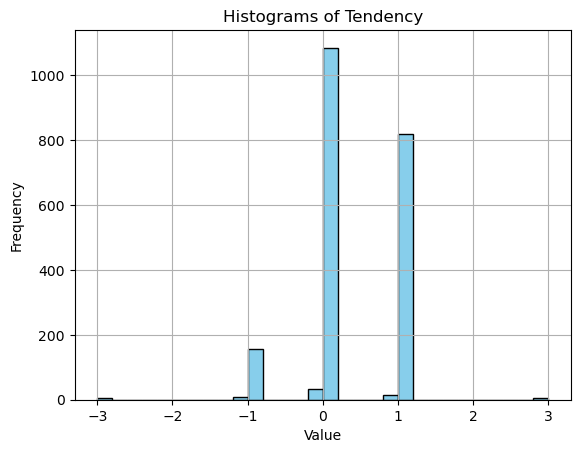

In [62]:
df['Tendency'].hist(bins=30,color='skyblue',edgecolor ='black')
plt.title('Histograms of Tendency')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

### *Boxplot

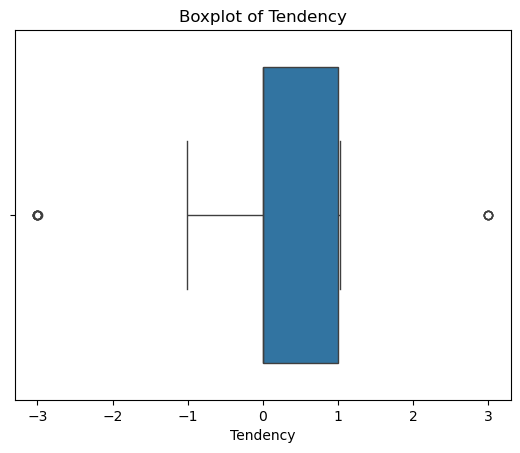

In [63]:
sns.boxplot(x = df['Tendency'])
plt.title('Boxplot of Tendency')
plt.show()

### 2.Bar charts or pie charts to display the frequency of categories for categorical variables

### *Bar Charts

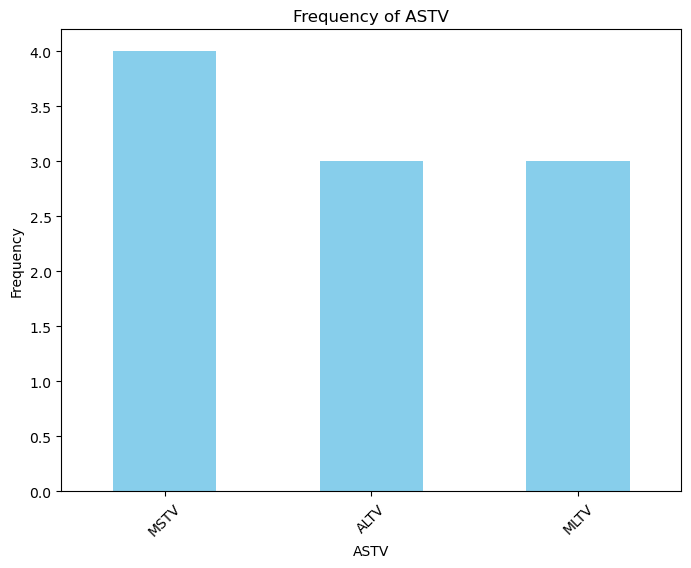

In [64]:
data = {'ASTV': ['MSTV', 'ALTV', 'ALTV', 'MSTV', 'MLTV', 'MLTV', 'ALTV', 'MSTV', 'MLTV', 'MSTV']}
df = pd.DataFrame(data)

# Calculate the frequency of each category (count of each color)
category_counts = df['ASTV'].value_counts()

# 1. **Bar Chart** of Category Frequencies
plt.figure(figsize=(8,6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of ASTV')
plt.xlabel('ASTV')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

### *Pie Charts

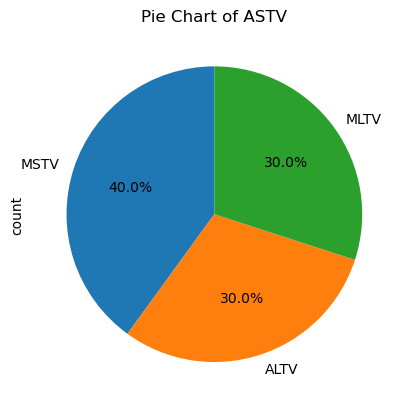

In [65]:
df['ASTV'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of ASTV')
plt.show()

### 3.Scatter plots or correlation heatmaps to explore relationships between pairs of variables

###  *Scatter plots

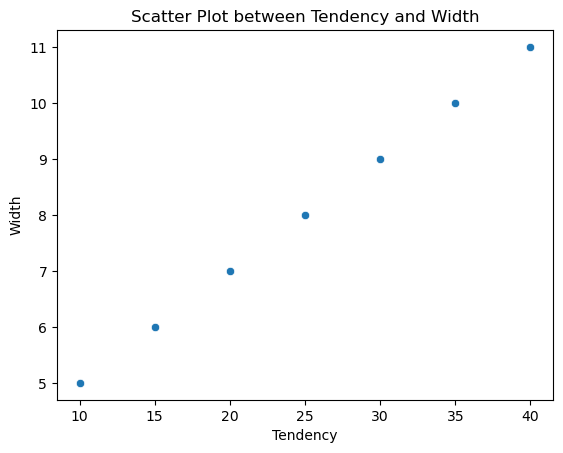

In [66]:
data = {
    'Tendency': [10, 15, 20, 25, 30, 35, 40],
    'Width': [5, 6, 7, 8, 9, 10, 11]
}
df = pd.DataFrame(data)

# Create a scatter plot
sns.scatterplot(data=df, x='Tendency', y='Width')

# Add title and labels
plt.title('Scatter Plot between Tendency and Width')
plt.xlabel('Tendency')
plt.ylabel('Width')

# Show the plot
plt.show()

### *Heatmaps

In [67]:
features_response = df.columns.tolist()
features_response

['Tendency', 'Width']

In [68]:
corr = df[features_response].corr()
corr.iloc[0:5,0:5]

,Tendency,Width
Tendency,1.0,1.0
Width,1.0,1.0


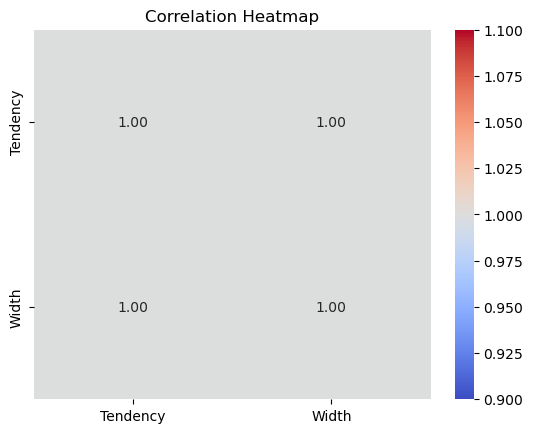

In [69]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()



### 4.Employ advanced visualization techniques like pair plots, or violin plots for deeper insights

### *Pair plots

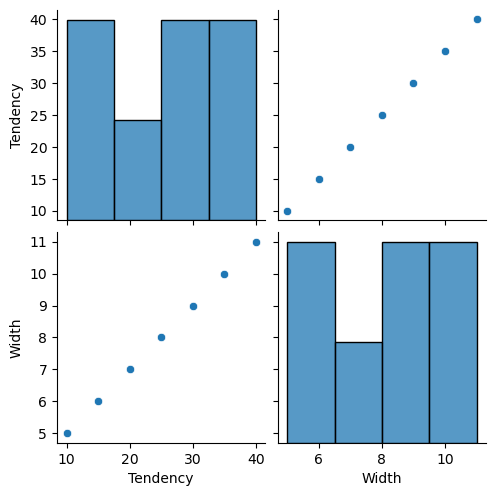

In [70]:
sns.pairplot(df[['Tendency','Width']])
plt.show()

### *Violin plot

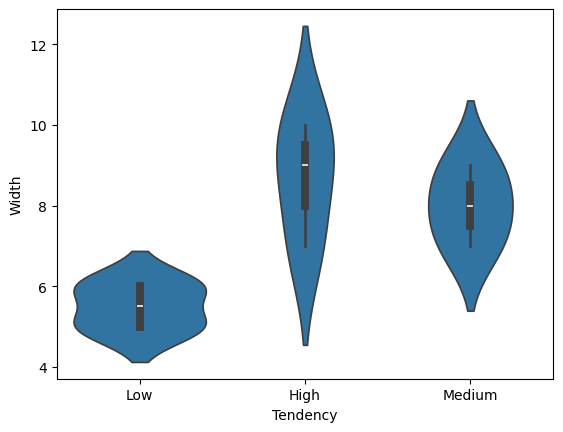

In [71]:
data = {
    'Tendency': ['Low', 'Low', 'High', 'Medium', 'Medium', 'High', 'Low', 'Medium', 'High', 'Low'],
    'Width': [5, 6, 7, 8, 9, 10, 5, 7, 9, 6]
}
df = pd.DataFrame(data)
sns.violinplot(x='Tendency', y='Width', data=df)
plt.show()


### *4.Pattern Recognition and Insights

In [75]:
print(corr_matrix)

          Tendency  Width
Tendency       1.0    1.0
Width          1.0    1.0


In [76]:
df['Tendency'].unique()

array(['Low', 'High', 'Medium'], dtype=object)

In [77]:
df = df.dropna(subset=['Tendency'])

In [78]:
df['Width'] = pd.to_numeric(df['Width'], errors='coerce')


In [79]:
print(df.index)


RangeIndex(start=0, stop=10, step=1)


In [80]:
df['Tendency'] = pd.to_numeric(df['Tendency'], errors='coerce')
df = df.dropna(subset=['Tendency'])
df.groupby('Width')['Tendency'].mean().sort_values(ascending=False)

Series([], Name: Tendency, dtype: float64)

In [81]:
np.random.seed(seed = 6)
X_1_pos = np.random.uniform(low = 1,high = 7,size=(20,1))
print(X_1_pos[0:3])
X_1_neg = np.random.uniform(low = 3,high = 10,size=(20,1))
print(X_1_neg[0:3])
X_2_pos = np.random.uniform(low = 1,high = 7,size=(20,1))
print(X_2_pos[0:3])
X_2_neg = np.random.uniform(low = 3,high = 10,size=(20,1))
print(X_2_neg[0:3])


[[6.35716091]
 [2.99187883]
 [5.92737474]]
[[3.38132155]
 [8.03046066]
 [8.61519394]]
[[5.4790643 ]
 [5.3444234 ]
 [3.43664678]]
[[9.19684856]
 [9.83587114]
 [8.85836015]]


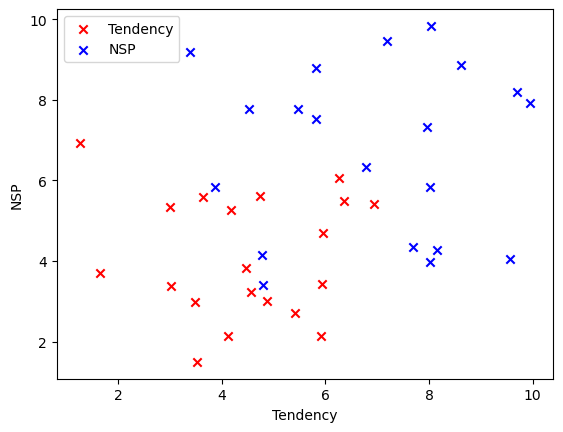

In [82]:
plt.scatter(X_1_pos,X_2_pos,color = 'red', marker = 'x')
plt.scatter(X_1_neg,X_2_neg,color = 'blue',marker = 'x')
plt.xlabel('Tendency')
plt.ylabel('NSP')
plt.legend(['Tendency','NSP'])